In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'model'))

In [31]:
import sys
import random
import os
from processes.all_processes import Matrix_1_epem_mupmum
from model.parameters import ModelParameters
from phase_space_generator.flat_phase_space_generator import FlatInvertiblePhasespace 


def get_xsec(E_cm, random_variables):
    active_model = ModelParameters(None)

    # Center of mass of the collision in GeV
    process_class = Matrix_1_epem_mupmum

    # Generate a random PS point for this process
    process = process_class()
    external_masses = process.get_external_masses(active_model)

    # Ensure that E_cm offers enough twice as much energy as necessary 
    # to produce the final states
    this_process_E_cm = max( E_cm, sum(external_masses[1])*2. )

    ps_generator = FlatInvertiblePhasespace(
        external_masses[0], external_masses[1],
        beam_Es = (this_process_E_cm/2.,this_process_E_cm/2.),
        # We do not consider PDF for this standalone check
        beam_types=(0,0)
    )

    # Generate some random variables
    PS_point, jacobian = ps_generator.generateKinematics(this_process_E_cm, random_variables)

    return process.smatrix(PS_point, active_model)

[]

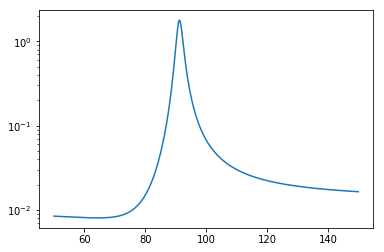

In [35]:
import numpy as np
import matplotlib.pyplot as plt
random_variables   = [random.random() for _ in range(ps_generator.nDimPhaseSpace())]
energies = np.linspace(50,150,1001)
plt.plot(energies,[get_xsec(e,random_variables) for e in energies])
plt.semilogy()

In [36]:
!code -n /